## Assignment No. 3

 1. Name    : Vaibhav Bichave
 2. class   : TE 10
 3. Roll No.: 33209
 

Problem Statement:
•	Load the dataset: birthwt Risk Factors Associated with Low Infant Birth Weight
1.	Test the association of mother’s (age) age and baby’s birth weight (bwt) using the correlation test and linear regression. 
2.	Test the association of mother’s weight (weight) and birth weight(bwt) using the correlation test and linear regression. 
3.	Produce two scatter plots of: 
(i)	mother’s age by baby’s birth weight; 
(ii)	mother’s weight by baby’s birth weight.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("Bwt.csv")

In [3]:
data.head()

,Unnamed: 0,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284,0,27,62,100,0
1,2,113,282,0,33,64,135,0
2,3,128,279,0,28,64,115,1
3,4,108,282,0,23,67,125,1
4,5,136,286,0,25,62,93,0


In [4]:
data.tail()

,Unnamed: 0,bwt,gestation,parity,age,height,weight,smoke
1169,1170,113,275,1,27,60,100,0
1170,1171,128,265,0,24,67,120,0
1171,1172,130,291,0,30,65,150,1
1172,1173,125,281,1,21,65,110,0
1173,1174,117,297,0,38,65,129,0


In [5]:
data.shape

(1174, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1174 non-null   int64
 1   bwt         1174 non-null   int64
 2   gestation   1174 non-null   int64
 3   parity      1174 non-null   int64
 4   age         1174 non-null   int64
 5   height      1174 non-null   int64
 6   weight      1174 non-null   int64
 7   smoke       1174 non-null   int64
dtypes: int64(8)
memory usage: 73.5 KB


In [7]:
#dropping the unnamed  column

data = data.drop(['Unnamed: 0'], axis = 1)
data.shape


(1174, 7)

In [8]:
data.isna().sum()

bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

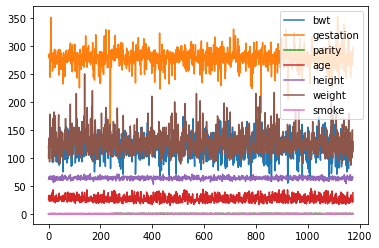

In [9]:
data.plot();

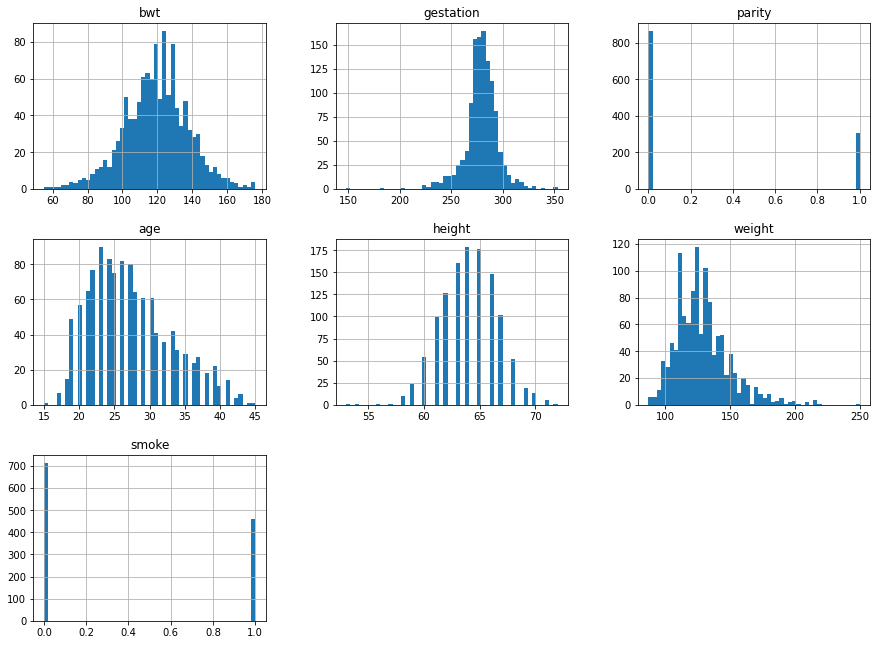

In [10]:
data.hist(bins = 50,figsize = (15,11));

In [11]:
data.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


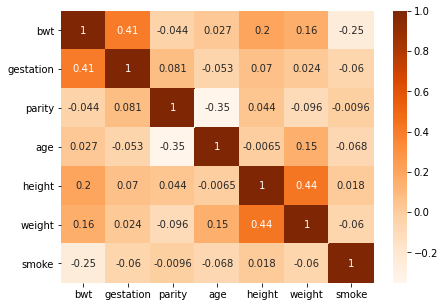

In [12]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

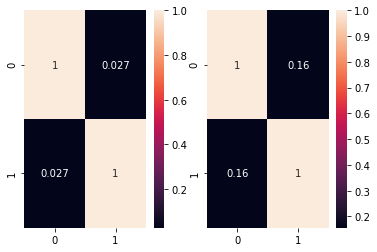

In [13]:
age=data["age"]
bwt= data["bwt"]
weight=data["weight"]


plt.subplot(1,2,1)
corr1= np.corrcoef(data["age"], data["bwt"])
sns.heatmap(corr1, annot=True)
#plt.show()


plt.subplot(1,2,2)
corr2= np.corrcoef(data["weight"], data["bwt"])
sns.heatmap(corr2, annot=True);

#plt.show()

## Checking Relation between Mother's age and Baby's bith weight

In [14]:
# Correlation of Baby's birth weight with Mother's age
print(age.corr(bwt))

0.02698291100292948


In [15]:
# Sepratating & assigning features and target columns to X & y

X = data[['age']]
y = data['bwt']


In [16]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((939, 1), (235, 1))

In [17]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [19]:
#importing required libraries 
from sklearn.metrics import mean_squared_error

#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.001
Linear Regression: Accuracy on test Data: -0.001

Linear Regression: The RMSE of the training set is: 17.91660809632274
Linear Regression: The RMSE of the testing set is: 19.827417592827626


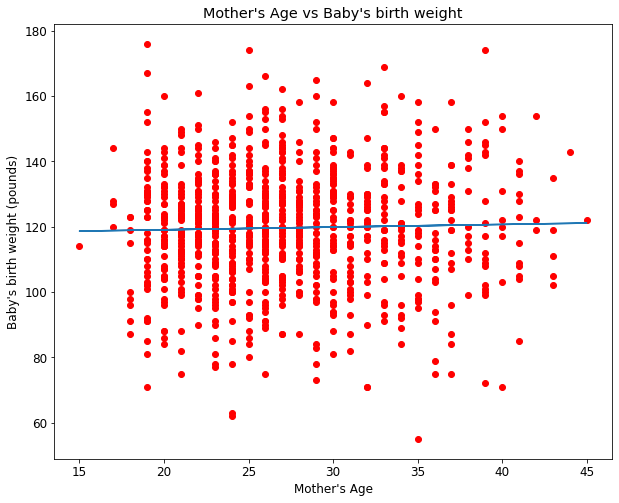

In [20]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 12})
plt.scatter(X_train,y_train,marker="o",c="red")
plt.title("Mother's Age vs Baby's birth weight")
plt.ylabel("Baby's birth weight (pounds)")
plt.xlabel("Mother's Age")
plt.plot(X_train,y_train_lr)
plt.show()

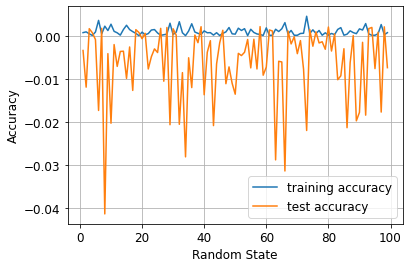

In [21]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 100
depth = range(1, 100)
for n in depth:
    # Splitting the dataset into train and test sets: 80-20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = n)
    X_train.shape, X_test.shape
    # fit the model
    lr.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(lr.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lr.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Random State")
plt.grid()
plt.legend();

## Checking Relation between Mother's weight and Baby's bith weight

In [22]:
# Correlation of Baby's birth weight with Mother's weight
print(weight.corr(bwt))

0.15592327018706933


In [23]:
# Sepratating & assigning features and target columns to X & y

X = data[['weight']]
y = data['bwt']


In [24]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((939, 1), (235, 1))

In [25]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [27]:
#importing required libraries 
from sklearn.metrics import mean_squared_error

#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.028
Linear Regression: Accuracy on test Data: 0.010

Linear Regression: The RMSE of the training set is: 17.669707560407133
Linear Regression: The RMSE of the testing set is: 19.72111045270696


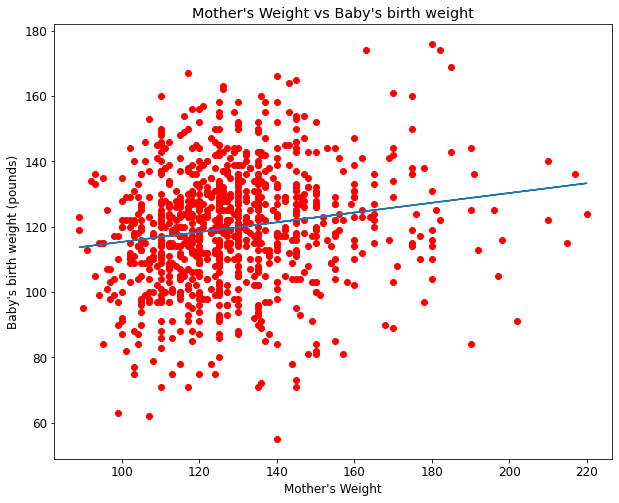

In [28]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 12})
plt.scatter(X_train,y_train,marker="o",c="red")
plt.title("Mother's Weight vs Baby's birth weight")
plt.ylabel("Baby's birth weight (pounds)")
plt.xlabel("Mother's Weight")
plt.plot(X_train,y_train_lr)
plt.show()

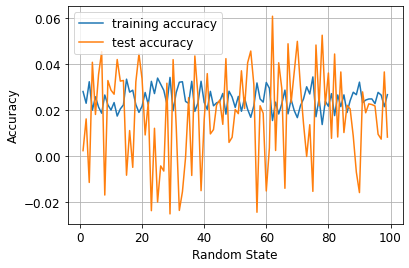

In [29]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 100
depth = range(1, 100)
for n in depth:
    # Splitting the dataset into train and test sets: 80-20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = n)
    X_train.shape, X_test.shape
    # fit the model
    lr.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(lr.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lr.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Random State")
plt.grid()
plt.legend();

### Conclusion
 1. Correlation of baby's weight with mother's age is very less. Hence, they are highly non-correlated.Therefore, Regression line could not fit the scatter plot properly.
 2. Correlation between baby's weight with mother's weight is greater than previous, but overall it is very less.Therefore, regression line fits through many points, but does not fit efficiently.